<a href="https://colab.research.google.com/github/anjalikokare/MLP-material/blob/main/week_mlp_PAweek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data = files.upload()

Saving DataPreprocessingGraded_dataset.csv to DataPreprocessingGraded_dataset (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer

In [ ]:
df = pd.read_csv('DataPreprocessingGraded_dataset.csv')


Q7. How many features have missing values in the dataset? [Hint: missing values are marked by '?']

In [ ]:
a = df.columns[(df == '?').any()]
print(a)

Index(['V1', 'V2'], dtype='object')


In [ ]:
df = pd.read_csv('DataPreprocessingGraded_dataset.csv',na_values = ['?'])


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
df.dtypes

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,object
Target,object



Q1.How many samples are there in this dataset?


In [ ]:
print(df.shape[0])

748


Q2 . How many input features are there in this dataset?


In [ ]:
print(df.shape[1]-1) # input features mtlab jinse hame prediction krn ahai aur output me Tareget colm milenga

5


Q3. What type of problem is this?
[Hint: look at the target variable.]

In [ ]:
# 'Classification Problem' --> yes\no type
y = df.Target.unique()
print(y)

['YES' 'NO']


Q4. Which of the features has least variance?
  [Hint: Ignore/remove missing values if any. Are there any categorical features?]

In [ ]:
a = df.dropna()
print(df.dtypes)
numerics = a.select_dtypes(include=['float64'])
var = numerics.var()
print(var.idxmin())


V1        float64
V2        float64
V3        float64
V4        float64
V5         object
Target     object
dtype: object
V2


Q5. Which of the following features has least number of outliers?
   [Hint: Which visualization marks outliers? Ignore/remove missing values if any]

In [ ]:
outlier_count = {}
numeric_cols = a.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = a[col].quantile(0.25)
    Q3 = a[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (a[col] < Q1 - 1.5*IQR) | (a[col] > Q3 + 1.5*IQR)
    outlier_count[col] = outliers.sum()
print(outlier_count)

{'V1': np.int64(7)}


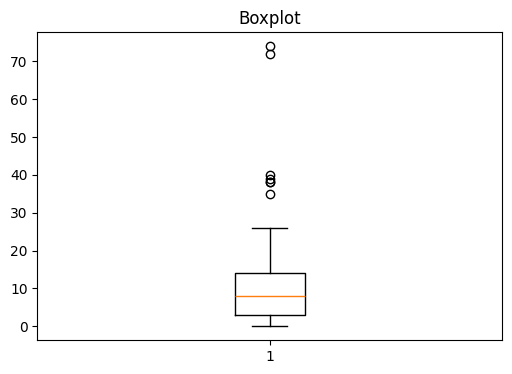

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(a[col])
    plt.title('Boxplot')
    plt.show()


Q6. Which of the following is true about target variable?

It has higher 'YES' entries than 'NO' entries.
It has higher 'NO' entries than 'YES' entries.
It has same number of entries of 'YES' and 'NO'


In [ ]:
a = (df['Target'] == 'YES').sum()
print(a)
b = (df['Target'] == 'NO').sum()
print(b)

178
570


Q8. What is total number of missing values in the dataset?


In [ ]:
df.replace('?',np.nan,inplace = True)
a =df.isna().sum().sum()
print(a)


10


Q9. What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?


In [ ]:
a = df[['V1']]
si = SimpleImputer(strategy = 'median')
a[['V1']] = si.fit_transform(a[['V1']])

avg_v1 = a['V1'].mean()
print(avg_v1)

9.552139037433156



Q10. What is average of first column after applyting KNNImputer(n_neighbors = 3)?

In [ ]:
a = df[['V1']]
ki = KNNImputer(n_neighbors=3)
a['V1'] = ki.fit_transform(a)


avg_v1 = a['V1'].mean()
print(avg_v1)

9.562584118438762


Q11. What is average of second feature (i.e. 'V2') after applyting SimpleImputer(strategy = 'mean')?

In [ ]:
b = df[['V2']]
si = SimpleImputer(strategy = 'mean')
b['V2'] = si.fit_transform(b)

avg_v2 = b['V2'].mean()
print(avg_v2)

5.464333781965007
